In [40]:
from warnings import filterwarnings
filterwarnings('ignore')

### Logistic Regression for Classification of categorical data

#### Read the iris.csv file

In [41]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
df.shape

(150, 5)

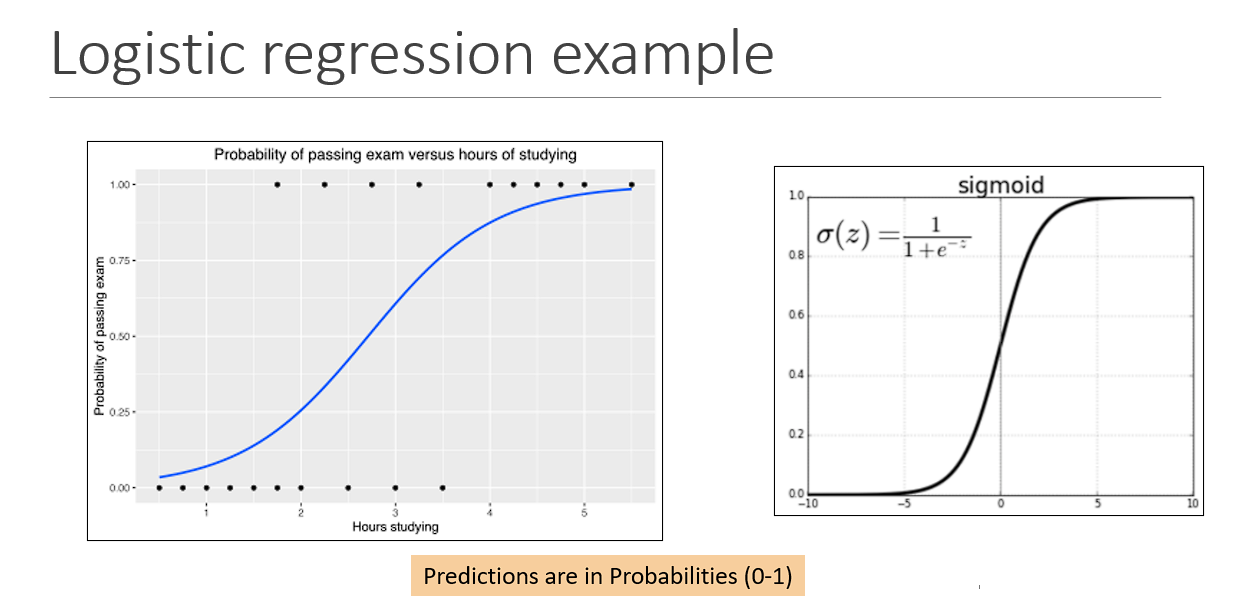

In [44]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## seperating x and y values of the dataframe

In [45]:
x = df.drop(columns=['species'])
y = df[['species']]

In [46]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [48]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [33]:
y.dtypes

species    object
dtype: object

### create preprocessing pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [35]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('Scaler',StandardScaler())])

In [36]:
x_pre = num_pipe.fit_transform(x)
x_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [37]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [38]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [39]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Train Test Split of data

In [49]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre,y,test_size=0.33,random_state=42)

In [50]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [51]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [52]:
xtrain.shape

(100, 4)

In [53]:
xtest.shape

(50, 4)

In [54]:
ytrain.value_counts()

species   
versicolor    35
virginica     34
setosa        31
Name: count, dtype: int64

In [55]:
ytest.value_counts()

species   
setosa        19
virginica     16
versicolor    15
Name: count, dtype: int64

In [56]:
xtrain.value_counts()

sepal_length  sepal_width  petal_length  petal_width
-1.870024     -0.131979    -1.510739     -1.447076      1
 0.310998     -0.592373     0.137547      0.132510      1
 0.553333      0.558611     1.274295      1.712096      1
              -0.362176     1.046945      0.790671      1
              -0.822570     0.649083      0.790671      1
                                                       ..
-0.779513     -0.822570     0.080709      0.264142      1
-0.900681      1.709595    -1.056039     -1.052180      1
                           -1.226552     -1.315444      1
               1.479398    -1.283389     -1.052180      1
 2.249683      1.709595     1.672157      1.317199      1
Name: count, Length: 100, dtype: int64

### create a logistic regression model

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

### Evaluate model accuracy in train and test data

In [59]:
model.score(xtrain,ytrain)

0.96

In [61]:
model.score(xtest,ytest)

0.98

## Predict the traing and testing results

In [62]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [63]:
ypred_tr[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [64]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [65]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [66]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


## Probabilities of the classes

In [67]:
yprob_tr = model.predict_proba(xtrain)
yprob_ts = model.predict_proba(xtest)

In [68]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [69]:
yprob_tr[0:5]

array([[4.95686980e-02, 8.63002265e-01, 8.74290371e-02],
       [3.21123404e-06, 2.15453325e-02, 9.78451456e-01],
       [4.23687454e-02, 7.38468271e-01, 2.19162984e-01],
       [9.78147815e-01, 2.18516222e-02, 5.63195942e-07],
       [1.63883862e-06, 2.40284295e-02, 9.75969932e-01]])

In [70]:
yprob_ts[0:5]

array([[1.32652759e-02, 8.66911368e-01, 1.19823356e-01],
       [9.66261739e-01, 3.37367505e-02, 1.51055599e-06],
       [1.06233010e-07, 4.98878802e-03, 9.95011106e-01],
       [1.55390481e-02, 7.41766515e-01, 2.42694437e-01],
       [2.45393159e-03, 7.35493663e-01, 2.62052405e-01]])

## Plot the confusion matrix for test data

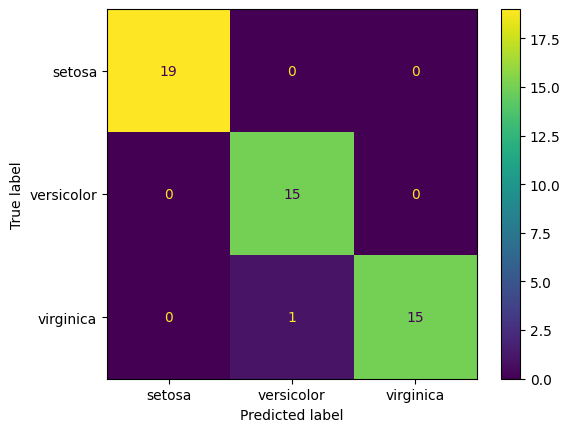

In [72]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

## Print Classification report

In [73]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Cross Validate the F1 score

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
acc_scores = cross_val_score(model,xtrain,ytrain,cv = 5,scoring='accuracy')
acc_scores

array([1.  , 0.8 , 0.9 , 1.  , 0.95])

In [77]:
acc_scores.mean()

0.93

In [78]:
f1_scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')
f1_scores

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [79]:
f1_scores.mean()

0.9319552669552669

In [80]:
precision_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='precision_macro')
precision_scores

array([1.        , 0.80952381, 0.92592593, 1.        , 0.95833333])

In [81]:
precision_scores.mean()

0.9387566137566138

In [82]:
recall_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='recall_macro')
recall_scores.mean()

0.9317460317460318

In [83]:
recall_scores.mean()

0.9317460317460318

### Predicting out of sample data

In [84]:
xnew = pd.read_csv('iris_sample.csv')
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [85]:
xnew.isna().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     1
dtype: int64

In [ ]:
#always apply pre.transform for predicting out of sample data

In [88]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre[0:5]

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.        , -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065]])

In [89]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671


### predict the values now

In [90]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [91]:
prob = model.predict_proba(xnew_pre)
prob

array([[2.35705190e-02, 8.81288277e-01, 9.51412045e-02],
       [1.28251490e-04, 6.48403123e-02, 9.35031436e-01],
       [1.35871550e-01, 8.52051623e-01, 1.20768266e-02],
       [7.39657817e-01, 2.60157201e-01, 1.84982061e-04],
       [4.68157201e-03, 3.25915460e-01, 6.69402968e-01],
       [9.60852724e-01, 3.91463666e-02, 9.09717230e-07],
       [1.53837835e-01, 8.11398228e-01, 3.47639361e-02],
       [5.92803830e-04, 1.59389434e-01, 8.40017762e-01],
       [9.82219289e-01, 1.77802654e-02, 4.45971177e-07],
       [9.02435861e-01, 9.74028753e-02, 1.61263728e-04],
       [2.24093916e-02, 8.98916925e-01, 7.86736836e-02],
       [3.37024002e-02, 9.43026082e-01, 2.32715180e-02],
       [2.74270313e-06, 1.79211881e-02, 9.82076069e-01],
       [4.04832296e-03, 6.75671195e-01, 3.20280482e-01],
       [7.05510530e-04, 4.88070732e-01, 5.11223757e-01]])

In [92]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [93]:
prob[0]

array([0.02357052, 0.88128828, 0.0951412 ])

In [95]:
prob[0].max()

0.8812882765717746

In [96]:
max_probs = []
for i in prob:
    max_probs.append(i.max())

In [97]:
max_probs[0:4]

[0.8812882765717746, 0.9350314362246421, 0.8520516230758751, 0.739657816838755]

### Save predictions and probabilities in xnew

In [98]:
xnew['species_pred']=preds
xnew['probability']=max_probs

In [99]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,probability
0,5.5,2.5,4.0,1.3,versicolor,0.881288
1,6.9,3.1,5.1,2.3,virginica,0.935031
2,5.1,2.5,3.0,1.1,versicolor,0.852052
3,4.4,2.9,NaN,0.2,setosa,0.739658
4,5.9,3.0,5.1,1.8,virginica,0.669403
5,5.5,3.5,1.3,0.2,setosa,0.960853
6,5.6,NaN,3.6,1.3,versicolor,0.811398
7,6.5,3.0,5.2,2.0,virginica,0.840018
8,5.3,3.7,1.5,0.2,setosa,0.982219
9,5.1,3.4,1.5,NaN,setosa,0.902436


In [100]:
xnew.to_csv('Results_sample.csv',index=False)